/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,265 (75.25 KB)

 Trainable params: 19,265 (75.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.1136 - val_loss: 0.0908
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0956 - val_loss: 0.0883
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0876 - val_loss: 0.0883
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0923 - val_loss: 0.0859
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0838 - val_loss: 0.0857
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0850 - val_loss: 0.0858
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0840 - val_loss: 0.0858
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0879 - val_loss: 0.0865
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0882 - val_loss: 0.0862
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0882 - val_loss: 0.0864
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0875 - val_loss: 0.0866
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

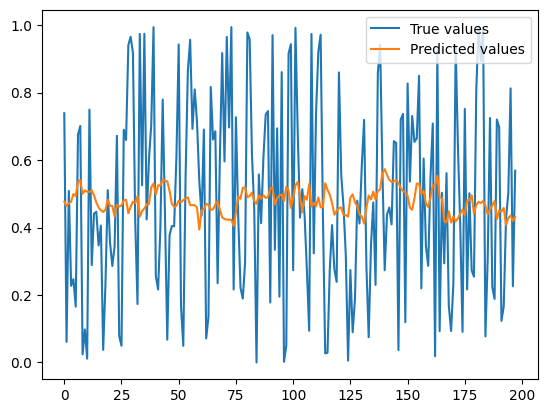

In [ ]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Random example of time series data (1000 samples, 10 features)
n_samples = 1000
n_features = 10
data = np.random.rand(n_samples, n_features)

# Normalize the data (for LSTM, it's good practice to normalize)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Create a sequence dataset for LSTM
sequence_length = 10

# Prepare the data
X = []
y = []
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i])
    y.append(data_scaled[i, 0])  # Predict the first feature (can be changed)

X = np.array(X)
y = np.array(y)

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()

# Add an LSTM layer (input shape is (sequence_length, n_features))
model.add(LSTM(units=64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# Optionally, you can add more LSTM layers
model.add(Dropout(0.2))

# Output layer (1 output for regression, change units for classification)
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")

# Make predictions (for the test data)
predictions = model.predict(X_test)

# You can also visualize the predictions if necessary
import matplotlib.pyplot as plt

plt.plot(y_test, label="True values")
plt.plot(predictions, label="Predicted values")
plt.legend()
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Embedding, Dense

# Sample text dataset
text_data = [
    "deep learning is powerful",
    "deep learning is amazing",
    "deep learning is the future",
    "machine learning is evolving",
    "natural language processing is exciting",
    "artificial intelligence is revolutionary",
    "transformers are changing AI",
    "LSTMs are useful for sequences"
]

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1  # +1 for padding index

# Creating input sequences
input_sequences = []
for sentence in text_data:
    token_list = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i + 1]
        input_sequences.append(n_gram_sequence)

# Padding sequences
max_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_length, padding='pre')

# Splitting input (X) and labels (y)
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Defining the model
model = Sequential([
    Embedding(total_words, 10, input_length=max_length - 1),  # Word embeddings
    GRU(100, return_sequences=True),
    GRU(100),
    Dense(total_words, activation='softmax')  # Multi-class classification
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X, y, epochs=100, verbose=1)

# Function to Predict Next Word
def predict_next_word(seed_text, num_words=1):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_length - 1, padding='pre')
        if len(token_list[0]) == 0:
            break  # Avoid error if seed_text is not found in tokenizer
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        predicted_word = tokenizer.index_word.get(predicted_index, "")
        if not predicted_word:
            break  # Stop if no valid word is found
        seed_text += " " + predicted_word
    return seed_text

# Testing the prediction function
input_text = "deep learning"
predicted_sentence = predict_next_word(input_text, num_words=3)
print("Predicted Text:", predicted_sentence)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0370 - loss: 3.2185
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.1481 - loss: 3.2103
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2222 - loss: 3.2016
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.2222 - loss: 3.1919
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2222 - loss: 3.1809
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2222 - loss: 3.1681
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2222 - loss: 3.1531
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.2222 - loss: 3.1355
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2222 - loss: 3.1148
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2222 - loss: 3.0906
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2222 - loss: 3.0623
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.2222 - loss: 3.0293
E